<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#非線形最小2乗法の原理" data-toc-modified-id="非線形最小2乗法の原理-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>非線形最小2乗法の原理</a></span></li><li><span><a href="#python-code" data-toc-modified-id="python-code-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>python code</a></span></li><li><span><a href="#具体的な手順" data-toc-modified-id="具体的な手順-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>具体的な手順</a></span></li><li><span><a href="#pythonによる解法の指針" data-toc-modified-id="pythonによる解法の指針-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>pythonによる解法の指針</a></span></li><li><span><a href="#Gauss-Newton法に関するメモ" data-toc-modified-id="Gauss-Newton法に関するメモ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gauss-Newton法に関するメモ</a></span></li><li><span><a href="#課題" data-toc-modified-id="課題-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>課題</a></span><ul class="toc-item"><li><span><a href="#Gaussian(正規分布)へのフィット" data-toc-modified-id="Gaussian(正規分布)へのフィット-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Gaussian(正規分布)へのフィット</a></span></li></ul></li></ul></div>

<br />

<div style="text-align: center;">
<font size="7">非線形最小2乗法(NonLinearFit)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/Users/bob/Github/TeamNishitani/jupyter_num_calc/nonlinearfit</font>
<br />
<font size="4">https://github.com/daddygongon/jupyter_num_calc/tree/master/notebooks_python</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2017-8 </font>
</div>


# 非線形最小2乗法の原理



前章では，データに近似的にフィットする最小二乗法を紹介した．ここでは，フィット式が多項式のような線形関係にない関数の最小二乗法を紹介する．図のようなデータにフィットする場合を考えよう．

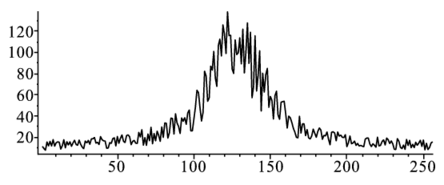
![C9_NonLinearFitplot2d1.png](figs/C9_NonLinearFitplot2d1.png)

このデータにあてはめるのはローレンツ関数，

$$
F \left(x;\mathbf{a} \right)=a _{1}+ \frac{a _{2}}{a _{3}+\left(x -a _{4}\right)^{2}}
$$
である．この関数の特徴は，今まで見てきた関数と違いパラメータが線形関係になっていない．誤差関数は，いままでと同様に

$$
\chi ^{2}\left(\mathbf{a} \right)={\sum_i^N }d _{i }^{2}=\sum_i^N \left(F \left(x _{i };\mathbf{a} \right)-y _{i }\right)^{2}
$$
で，$\mathbf{a}=\{a_0, a_1,..\}$をパラメータとして変えた時に最小となる値を求める点もかわらない．しかし，線形の最小二乗法のように微分しても一元の方程式にならず，連立方程式を単に解くだけでは求まらない．

そこで図のような2次関数の最小値を求める場合を考える．最小値の点$a_0$のまわりで，Taylor展開すると，$\mathbf{d,D}$をそれぞれの係数とすると，

$$
\chi^2 \left( \mathbf{a} \right)= \chi^2 \left( \mathbf{a_0}  \right) - \mathbf{d} \left(\mathbf{a}-\mathbf{a_0} \right) +\frac{1}{2} \mathbf{D} \left(\mathbf{a}-\mathbf{a_0} \right)^{2}
$$
である．最小の点$a_0$は，微分が$0$になるので，

$$
\mathbf{a _{0}}=\mathbf{a} + \mathbf{D} ^{-1} \times (-\mathbf{d})
$$
と予測される．


図を参照して上の式を導け．またその意味を考察せよ．
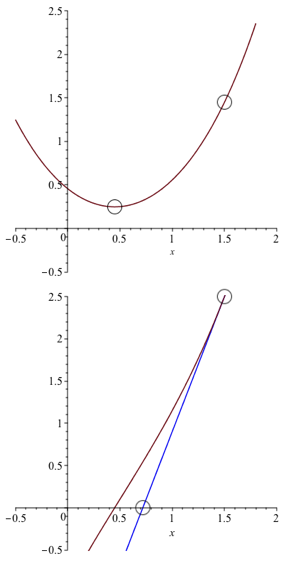
![non_linear_fit_graph](figs/non_linear_fit_graph.png)

現実には高次項の影響で計算通りにはいかず，単に最小値の近似値を求めるだけである．これは，$ \chi \left(\mathbf{a} \right)  ^{2}$の微分関数の解をNewton法で求める操作に対応する．つまり，この操作を何度も繰り返せばいずれ解がある精度で求まるはず．





# python code

幾つもの関数が用意されている．
* curve_fit
* curve_fit with bounds
* least square fit

全部を理解する必要はないが，manualを見ながら使うことができるといいね．
boundsとかparamsの初期値が重要．

[ 0.96841251 10.29487687  1.02875755  4.00673941]


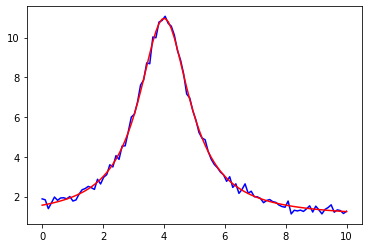

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(t, a1, a2, a3, a4):
    return a1+a2/(a3+(t-a4)**2)

xdata = np.linspace(0, 10, 100)
y = func(xdata, 1, 10, 1, 4)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
plt.show()

[ 10.98942083  40.38847822 380.43816378  90.64593936 127.89666184]


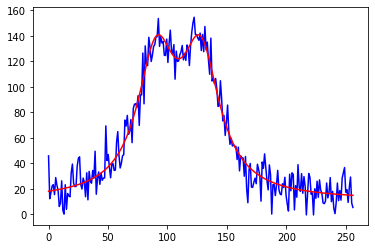

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(t, a1, a2, a3, a4, a5):
    return a1+a2*1000/(a3+(t-a4)**2)+a2*1000/(a3+(t-a5)**2)

xdata = np.linspace(0, 256, 256)
y = func(xdata, 10, 40, 380, 90, 128)
y_noise = 10 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [15,50,400,100,150]))
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')

print(popt)
plt.show()



In [3]:
import scipy.optimize
from numpy import *

params0=[15,50,400,100,150]

def fit_func(params,t,y):
    a1,a2,a3,a4,a5=params
    residual=y-(a1+a2*1000/(a3+(t-a4)**2)+a2*1000/(a3+(t-a5)**2))
    return residual

params, cov=scipy.optimize.leastsq(fit_func,params0,args=(xdata, ydata))
print(params)

[ 10.98940239  40.38851397 380.43848891  90.64591573 127.89666248]


In [4]:
?curve_fit

# 具体的な手順

パラメータの初期値を

$$
\boldsymbol{a}_0 + \Delta \boldsymbol{a} = \left\{a_{{0}}+\Delta\,a,\,b_{{0}}+\Delta\,b,\,c_{{0}}+\Delta\,c,\,d_{{0}}+\Delta\,d\right\}
$$
とする．このとき関数$f$を真値$a_0, b_0, c_0, d_0$のまわりでテイラー展開し，高次項を無視すると

$$
\Delta\,f=f \left( a_{{0}}+\Delta\,a_{{1}},b_{{0}}+\Delta\,b_{{1}},c_{{0}}+\Delta\,c_{{1}},d_{{0}}+\Delta\,d_{{1}} \right) -f \left( a_{{0}},b_{{0}},c_{{0}},d_{{0}} \right)
$$


$$
=\left(\frac{\partial }{\partial a }f \right)_{0}\Delta a _{1}+\left(\frac{\partial }{\partial b }f \right)_{0}\Delta b _{1}+\left(\frac{\partial }{\partial c }f \right)_{0}\Delta c _{1}+\left(\frac{\partial }{\partial d }f \right)_{0}\Delta d _{1}
$$
となる．

課題でつくったデータはt = 1からt = 256までの時刻に対応したデータ点$f_{1},\,f_{2},\,\cdots  f_{256}$とする．各測定値とモデル関数から予想される値との差$\Delta f_1,\Delta f_2,\cdots,\Delta f_{256}$は，
$$
\left(\begin{array}{c}\Delta f _{1} \\\Delta f _{2} \\ \vdots \\\Delta f _{256} \\\end{array}\right)=J \left(\begin{array}{c}\Delta a _{1} \\\Delta b _{1} \\\Delta c _{1} \\\Delta d _{1} \\\end{array}\right)
$$
となる．ここで$J$はヤコビ行列と呼ばれる行列で，4列256行
$$
J =\left(\begin{array}{cccc}\left(\frac{\partial }{\partial a }f \right)_{1} & \left(\frac{\partial }{\partial b }f \right)_{1} & \left(\frac{\partial }{\partial c }f \right)_{1} & \left(\frac{\partial }{\partial d }f \right)_{1} \\ \vdots & \vdots  &  \vdots & \vdots  \\\left(\frac{\partial }{\partial a }f \right)_{256} & \left(\frac{\partial }{\partial b }f \right)_{256} & \left(\frac{\partial }{\partial c }f \right)_{256} & \left(\frac{\partial }{\partial d }f \right)_{256} \\\end{array}\right)
$$
である．このような矩形行列の逆行列は転置行列$J^T$を用いて，`
$$
J ^{-1}=\left(J ^{T }J \right)^{-1}J ^{T }
$$
と表わされる．したがって，真値からのずれは
$$
\left(\begin{array}{c}\Delta a_2 \\\Delta b_2 \\\Delta c_2 \\\Delta d_2 \\\end{array}\right)
=\left(J ^{T }J \right)^{-1}J ^{T }
\left(\begin{array}{c}\Delta f _{1} \\\Delta f _{2} \\ \vdots \\\Delta f _{256} \\\end{array}\right)
$$
で求められる．理想的には$(\Delta a_2,\,\Delta b_2,\,\Delta c_2,\,\Delta d_2)$は$(\Delta a,\,\Delta b,\,\Delta c,\,\Delta d)$に一致するはずだが，測定誤差と高次項のために一致しない．初期値に比べ，より真値に近づくだけ．そこで，新たに得られたパラメータの組を新たな初期値に用いて，より良いパラメータに近付けていくという操作を繰り返す．新たに得られたパラメータと前のパラメータとの差がある誤差以下になったところで計算を打ち切り，フィッティングの終了となる．




# pythonによる解法の指針

まずは，お任せでcurve_fitを試しましょう．

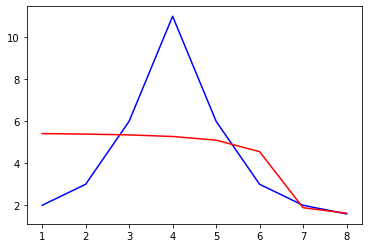

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(t, a1, a2, a3, a4):
    return a1+a2/(a3+(t-a4)**2)

ndata = 8
nparam = 4
xdata = np.linspace(1, 8, ndata)
y = func(xdata, 1, 10, 1, 4)
#y = func(xdata, 5,-2,0,7)
ydata = y
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
plt.show()

In [6]:
print(popt)

[ 5.4714478  -2.5260854   0.4296826   7.52394083]


うまくいってません．curve_fitの失敗の原因は，ほとんどが初期値の取り方のせいです．

では，手計算でどうなるかを観て行きましょう．まずは初期値として適当な値を取ります．さらに，numpyと線形代数計算のためにscipy.linalg as linalgを呼びだしておきます．サンプルデータydataと初期値で予測される関数を同時にplotして観ます．


In [7]:
guess1 = [1, 8, 1, 4.5]

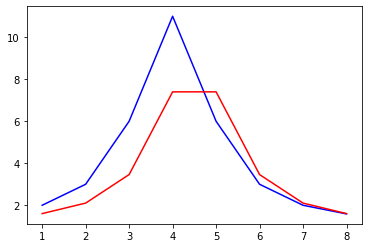

In [8]:
from pprint import pprint
import scipy.linalg as linalg
plt.plot(xdata, ydata, 'b-', label='data')

plt.plot(xdata, func(xdata, *guess1), 'r-', label='fit')
plt.show()

ydataと予測した関数との差をdfに入れます．

見やすいように，小数点以下を3桁表示に制限しています．

In [9]:
np.set_printoptions(precision=3, suppress=True)

df=np.zeros([ndata])
for i in range(0,ndata):
    df[i] = ydata[i]-func(xdata[i], *guess1)

pprint(df)

array([ 0.396,  0.897,  2.538,  3.6  , -1.4  , -0.462, -0.103, -0.016])


ローレンツ型の関数を仮定し，関数として定義．
```python
def func(t, a1, a2, a3, a4):
    return a1+a2/(a3+(t-a4)**2)
```
ヤコビアンの中の微分を新たな関数として定義します．
$$
{\it dfda1}\, := \,x\mapsto 1 \notag \\
{\it dfda2}\, := \,x\mapsto  \left( {\it a3}+ \left( x-{\it a4} \right) ^{2} \right) ^{-1}
\notag \\
{\it dfda3}\, := \,x\mapsto -{\frac {{\it a2}}{ \left( {\it a3}+ \left( x-{\it a4} \right) ^{2} \right) ^{2}}} \notag \\
{\it dfda4}\, := \,x\mapsto -{\frac {{\it a2}\, \left( -2\,x+2\,{\it a4} \right) }{ \left( {\it a3}+ \left( x-{\it a4} \right) ^{2} \right) ^{2}}}  \notag
$$

In [10]:
def dfda1(x, a1, a2, a3, a4):
    return 1
def dfda2(x, a1, a2, a3, a4):
    return (a3 + (x - a4)**2)**(-1)
def dfda3(x, a1, a2, a3, a4):
    return -a2/(a3 + (x -a4)**2)**2
def dfda4(x, a1, a2, a3, a4):
    return -a2*(-2*x +2*a4)/(a3 + (x-a4)**2)**2

Jacobian行列を作ります．

In [11]:
Jac=np.zeros([ndata,nparam])
for i in range(0,ndata):
    Jac[i,0] = dfda1(xdata[i], *guess1)
    Jac[i,1] = dfda2(xdata[i], *guess1)
    Jac[i,2] = dfda3(xdata[i], *guess1)
    Jac[i,3] = dfda4(xdata[i], *guess1)
pprint(Jac)

array([[ 1.   ,  0.075, -0.046, -0.319],
       [ 1.   ,  0.138, -0.152, -0.761],
       [ 1.   ,  0.308, -0.757, -2.272],
       [ 1.   ,  0.8  , -5.12 , -5.12 ],
       [ 1.   ,  0.8  , -5.12 ,  5.12 ],
       [ 1.   ,  0.308, -0.757,  2.272],
       [ 1.   ,  0.138, -0.152,  0.761],
       [ 1.   ,  0.075, -0.046,  0.319]])


$$
J ^{-1}=\left(J ^{T }J \right)^{-1}
$$
を求めます．

In [12]:
iJac = linalg.inv(np.dot(np.transpose(Jac),Jac))
print(iJac)

[[ 1.017 -6.476 -0.821  0.   ]
 [-6.476 50.763  6.775 -0.   ]
 [-0.821  6.775  0.933 -0.   ]
 [ 0.    -0.    -0.     0.016]]


In [13]:
Jdf = np.dot(np.transpose(Jac),df)
pprint(Jdf)

array([  5.451,   2.537, -12.975, -33.309])


In [14]:
np.dot(iJac, Jdf)

array([-0.235,  5.592,  0.613, -0.52 ])

これをまたもとの近似値(guess)に入れ直して表示させると以下のようになる．カーブがデータに近づいているのが確認できるでしょう．

In [15]:
guess1 = guess1 + np.dot(iJac, Jdf)
pprint(guess1)

array([ 0.765, 13.592,  1.613,  3.98 ])


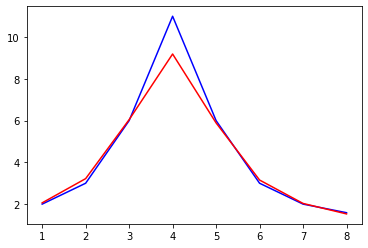

In [16]:
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *guess1), 'r-', label='fit')
plt.show()

この操作をずれが十分小さくなるまで繰り返します．

array([1.151, 7.778, 0.655, 4.004])


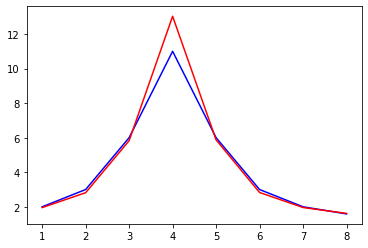

In [17]:
df=np.zeros([ndata])
for i in range(0,ndata):
    dy = ydata[i]-func(xdata[i], *guess1)
    df[i]=dy
#pprint(df)
Jac=np.zeros([ndata,nparam])
for i in range(0,ndata):
    Jac[i,0] = dfda1(xdata[i], *guess1)
    Jac[i,1] = dfda2(xdata[i], *guess1)
    Jac[i,2] = dfda3(xdata[i], *guess1)
    Jac[i,3] = dfda4(xdata[i], *guess1)
# pprint(Jac)
iJac = linalg.inv(np.dot(np.transpose(Jac),Jac))
# print(iJac)
Jdf = np.dot(np.transpose(Jac),df)
# pprint(Jdf)
guess1 = guess1 + np.dot(iJac, Jdf)
pprint(guess1)
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *guess1), 'r-', label='fit')
plt.show()

4回ほど繰り返すと以上の通り，いい値に収束してます．

# Gauss-Newton法に関するメモ



このGauss-Newton法と呼ばれる非線形最小二乗法は線形問題から拡張した方法として論理的に簡明であり，広く使われている．しかし，収束性は高くなく，むしろ発散しやすいので注意が必要．2次の項を無視するのでなく，うまく見積もる方法を用いたのがLevenberg-Marquardt法である．明快な解説がNumerical Recipes in C(Ｃ 言語による数値計算のレシピ）WilliamH.Press 他著，技術評論社1993にある．




# 課題

##  Gaussian(正規分布)へのフィット

正規分布で知られる，ガウス関数
$$
f(x)= \frac{1}{\sqrt{2\pi\sigma}}
\exp \left(\frac{- (x-\mu)^2}{2\sigma^2} \right)
$$
でフィットをやってみましょう．

例えば，平均値($\mu$)が60点，偏差値($\sigma$)が15点，ピークの人数が20人としましょう．

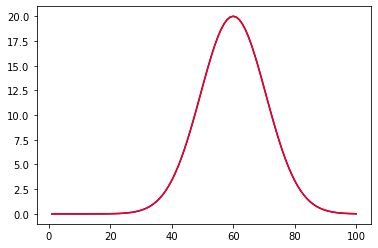

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a1, a2, a3):
    return a1*np.exp(-(x-a2)**2/a3**2)

ndata = 100
xdata = np.linspace(1, ndata, ndata)
y = func(xdata, 20, 60, 15)
ydata = y
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
plt.show()

In [23]:
print(popt)

[20. 60. 15.]


```python
guess1 = [10,50,10]
```
から初めてGauss-Newton法でfittingしなさい．

ただし，Gauss関数
$$
f(x) = {\it a_1}\,{\exp \left(-1/2\,{\frac { \left( x-{\it a_2} \right) ^{2}}{{{
\it a_3}}^{2}}}\right)}\\
$$

それぞれのパラメータでの微分は，
$$
\frac{\partial f}{\partial a_1}
={\exp \left({-\,{\frac { \left( x-{\it a_2} \right) ^{2}}{{2{\it a_3}}^{2
}}}}\right)} \\
$$

$$
\frac{\partial f}{\partial a_2}
={\frac {{\it a_1}\, \left( x-{\it a_2} \right) }
  {{{\it a_3}}^{2}}
  }
\exp\left({
      - {\frac { 
      \left( x-{\it a_2} \right) ^{2}}
      {{2 \it a_3^{2}}}}
    }\right)
$$
$$
\frac{\partial f}{\partial a_3}
={\frac {{\it a_1}\, \left( x-{\it a_2} \right) ^{2}}{{{\it a_3}}^{3}}
{
\exp\left({-
{\frac { \left( x-{\it a_2} \right) ^{2} }
{2{\it a_3}^2} 
}}\right)}}
$$　
これらの関数は次の通り定義される．

In [24]:
from pprint import pprint
import scipy.linalg as linalg

def dfda1(x,a1,a2,a3):
    return np.exp(-(x - a2) ** 2 / a3 ** 2 / 2)
def dfda2(x,a1,a2,a3):
    return  a1 * (x - a2) / a3 ** 2 * np.exp(-(x - a2) ** 2 / a3 ** 2 / 2)
def dfda3(x,a1,a2,a3):
    return a1 * (x - a2) ** 2 / a3 ** 3 * np.exp(-(x - a2) ** 2 / a3 ** 2 / 2)

以下の初期条件からfittingをおこなえ．

In [25]:
nparam = 3
guess1 = [10, 50, 10]